In [68]:
from sklearn.datasets import load_breast_cancer
from pprint import pprint
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split


In [69]:
data = load_breast_cancer()
pprint(data['DESCR'])

('.. _breast_cancer_dataset:\n'
 '\n'
 'Breast cancer wisconsin (diagnostic) dataset\n'
 '--------------------------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 569\n'
 '\n'
 '    :Number of Attributes: 30 numeric, predictive attributes and the class\n'
 '\n'
 '    :Attribute Information:\n'
 '        - radius (mean of distances from center to points on the perimeter)\n'
 '        - texture (standard deviation of gray-scale values)\n'
 '        - perimeter\n'
 '        - area\n'
 '        - smoothness (local variation in radius lengths)\n'
 '        - compactness (perimeter^2 / area - 1.0)\n'
 '        - concavity (severity of concave portions of the contour)\n'
 '        - concave points (number of concave portions of the contour)\n'
 '        - symmetry\n'
 '        - fractal dimension ("coastline approximation" - 1)\n'
 '\n'
 '        The mean, standard error, and "worst" or largest (mean of the three\n'
 '        worst/largest val

In [70]:
label_names = data['target_names']
y = data['target']
feature_names = data['feature_names']
X = data['data']
# create a base model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
base_clf = DecisionTreeClassifier(max_depth=6)
base_clf = base_clf.fit(X_train, y_train)
base_train_score = base_clf.score(X_train, y_train)
base_test_score = base_clf.score(X_test, y_test)
print(f"Train score: {base_train_score}. Test score: {base_test_score}")

Train score: 1.0. Test score: 0.9181286549707602


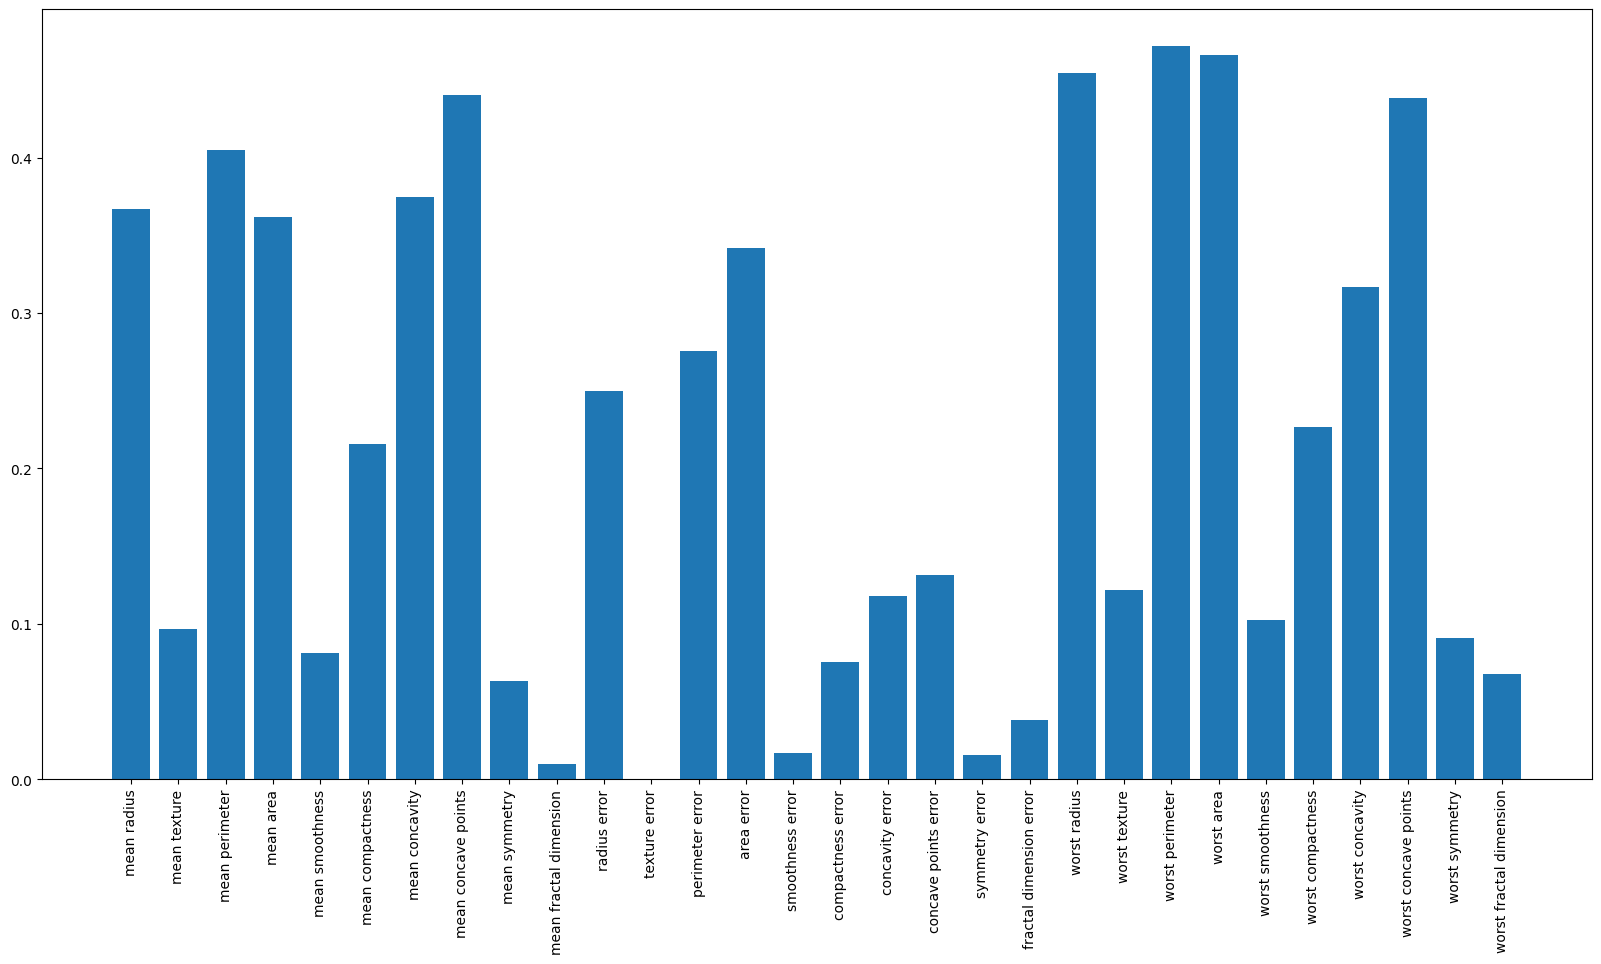

In [71]:
mi = mutual_info_classif(X, y)
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
plt.bar(np.arange(len(feature_names)), mi)
plt.show()


In [72]:
min_mi = 0.1
selected_columns = np.where(mi >= min_mi)[0]
X_selected = data['data'][:, selected_columns]
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

In [73]:
# create model with selected features only
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_selected_train, y_selected_train)
train_score = clf.score(X_selected_train, y_selected_train)
test_score = clf.score(X_selected_test, y_selected_test)
print(f"Train score: {train_score}. Test score: {test_score}")

Train score: 0.9974874371859297. Test score: 0.9532163742690059
